In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tree Builder

In [2]:
ax1 = "x"
ax2 = "y"

In [3]:
tree = pd.read_csv('../Data/tree_algorithm/set_tree.csv')
sdf = pd.read_csv('../Data/tree_algorithm/set_particles.csv')
tree

,x_min,y_min,z_min,sidex,sidey,sidez,depth,n
0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0,1000
1,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,1,64
2,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,2,8
3,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,3,1
4,0.083333,0.000000,0.000000,0.083333,0.083333,0.083333,3,1
...,...,...,...,...,...,...,...,...
751,0.833333,0.833333,0.666667,0.166667,0.166667,0.166667,2,2
752,0.666667,0.666667,0.833333,0.166667,0.166667,0.166667,2,4
753,0.833333,0.666667,0.833333,0.166667,0.166667,0.166667,2,2
754,0.666667,0.833333,0.833333,0.166667,0.166667,0.166667,2,2


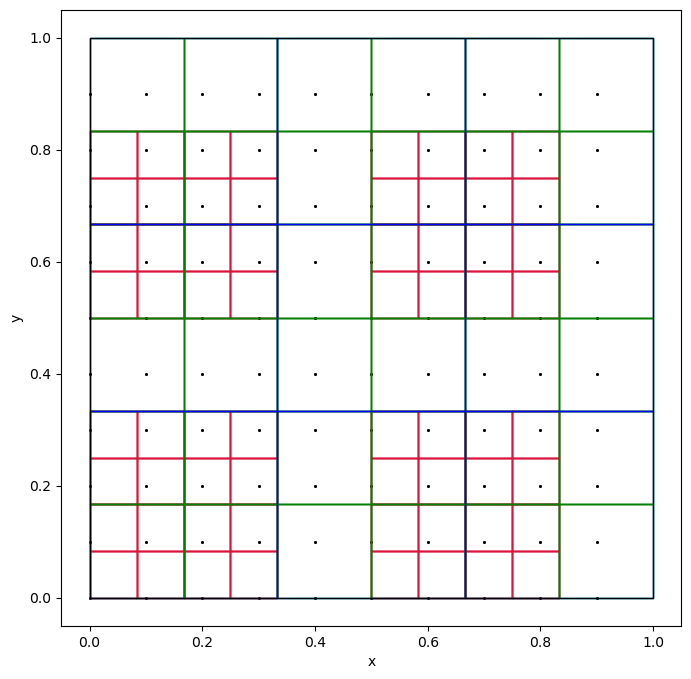

In [4]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree[ax1 + "_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8, zorder=10-tree["depth"][i]))
plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=1)
plt.xlabel(ax1)
plt.ylabel(ax2)
plt.show()

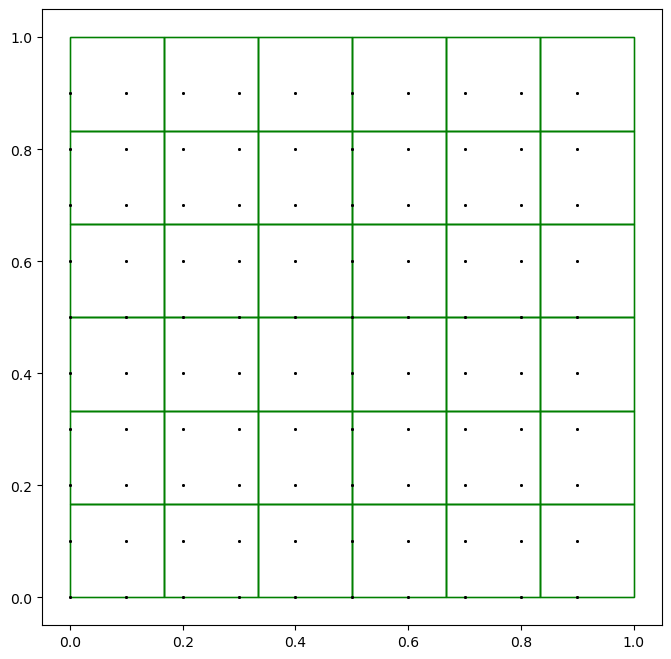

In [5]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    if tree["depth"][i] == 2:
        plt.gca().add_patch(Rectangle((tree[ax1+"_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8))
plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=1)
plt.show()

# Neighbor Finder

In [6]:
part = pd.read_csv('../Data/tree_algorithm/set_neighbors.csv')
particle = part["p"][0]
neighbors = part["p"][1:]

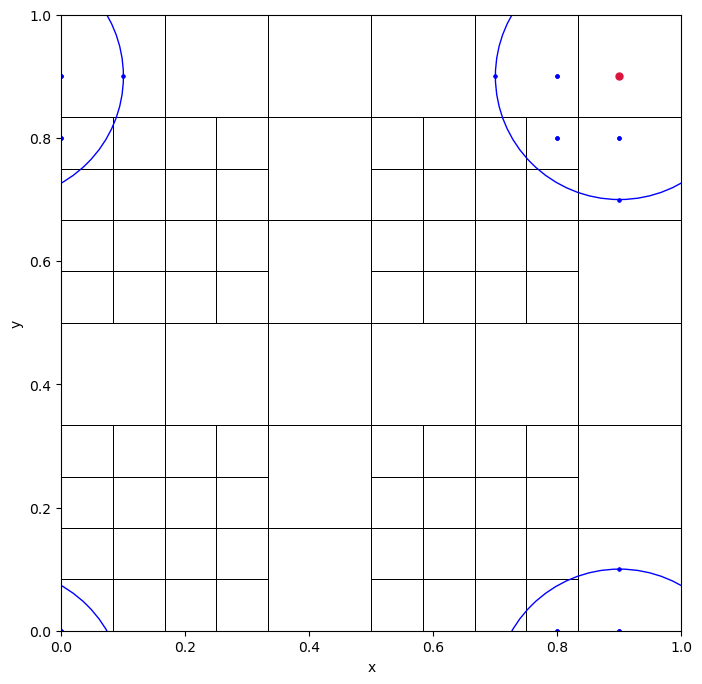

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
#plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=2)
plt.plot(sdf[ax1][neighbors], sdf[ax2][neighbors], '.', color='blue', ms=4)
plt.plot(sdf[ax1][particle], sdf[ax2][particle], 'o', color='crimson', ms=5)

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree[ax1+"_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor="k",
                    facecolor='none',
                    lw=0.5))

compact_domain = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain2 = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain3 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain4 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain5 = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain6 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain7 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain8 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain9 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
ax.add_patch(compact_domain)
ax.add_patch(compact_domain2)
ax.add_patch(compact_domain3)
ax.add_patch(compact_domain4)
ax.add_patch(compact_domain5)
ax.add_patch(compact_domain6)
ax.add_patch(compact_domain7)
ax.add_patch(compact_domain8)
ax.add_patch(compact_domain9)
ax.set_ylim(0,1.)
ax.set_xlim(0,1.)
ax.set_xlabel(ax1)
ax.set_ylabel(ax2)
plt.show()

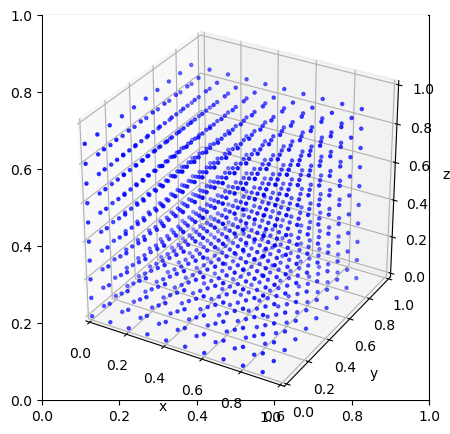

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#plt.plot(sdf['x'][neightbors], sdf['y'][particle], 'o', color='crimson', ms=5)

ax.scatter([sdf['x'][:]], [sdf['y'][:]], [sdf['z'][:]], color='blue', marker=".")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
ax.set_box_aspect([1,1,1])

plt.show()

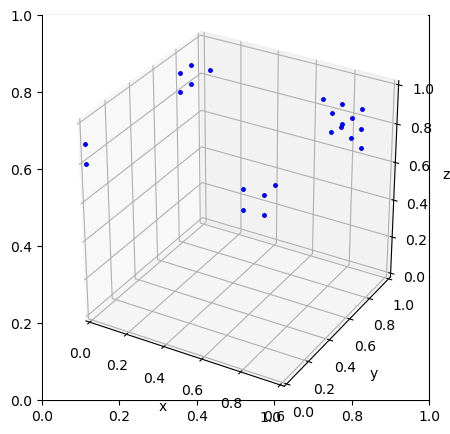

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#plt.plot(sdf['x'][neightbors], sdf['y'][particle], 'o', color='crimson', ms=5)

for ii in neighbors:
    ax.scatter([sdf['x'][ii]], [sdf['y'][ii]], [sdf['z'][ii]], color='blue', marker=".")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
ax.set_box_aspect([1,1,1])

plt.show()

In [10]:
x_ip = sdf["x"]-sdf.iloc[particle]["x"]
y_ip = sdf["y"]-sdf.iloc[particle]["y"]
z_ip = sdf["z"]-sdf.iloc[particle]["z"]
r_ip = np.sqrt(x_ip*x_ip + y_ip*y_ip + z_ip*z_ip)
radius = 2*sdf.iloc[particle]["h"]

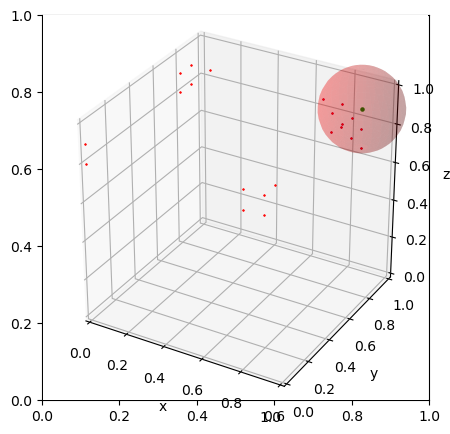

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

real_neigh = []
for ii in range(len(r_ip)):
    if r_ip[ii] < radius:
        real_neigh.append(ii)
        ax.scatter([sdf['x'][ii]], [sdf['y'][ii]], [sdf['z'][ii]], color='blue', marker=".", s=1, label="RealNeigh")

for ii in neighbors:
    ax.scatter([sdf['x'][ii]], [sdf['y'][ii]], [sdf['z'][ii]], color='r', marker=".", s=1, label="Tree")
    
ax.scatter(sdf.iloc[particle]["x"], sdf.iloc[particle]["y"], sdf.iloc[particle]["z"], marker="o", color="g",s=5, label="Particle")

r = radius
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = r*np.cos(u) * np.sin(v) + sdf.iloc[particle]["x"] 
y = r*np.sin(u) * np.sin(v) + sdf.iloc[particle]["y"]
z = r*np.cos(v) + sdf.iloc[particle]["z"]
ax.plot_surface(x, y, z, color="r", alpha=0.2, label="Compact domain")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim3d(0,1)
ax.set_ylim3d(0.,1)
ax.set_zlim3d(0.,1)
ax.set_box_aspect([1,1,1])

plt.show()

In [12]:
print(f"Number of neighbors: {len(real_neigh)}")
print(f"Number of neighbors tree: {len(neighbors)}")

Number of neighbors: 11
Number of neighbors tree: 46


In [13]:
print(len(neighbors.unique())== len(neighbors))

False


In [14]:
real_neigh

[799, 888, 889, 898, 899, 979, 988, 989, 997, 998, 999]